In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
import numpy.linalg as npl
import scipy.linalg as spl
import sklearn.metrics as sklm
import math
import matplotlib.pyplot as plt
import pandas as pd #for debugging

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
def gram_schmidt(a):
    q = []
    for i in range(len(a)):
        q_tilde = a[i]
        for j in range(len(q)):
            q_tilde = q_tilde - (q[j] @ a[i]) * q[j]

        if np.sqrt(np.sum(q_tilde**2)) <= 1e-10:
            print('Vectors are linearly dependent.')
            print('GS algorithm terminates at iteration', i + 1)
            return q

        q_tilde = q_tilde / np.sqrt(np.sum(q_tilde**2))
        q.append(q_tilde)

    print('Vectors are linearly independent.')
    return np.array(q)
def QR_factorization(A):
    Q_transpose = np.array(gram_schmidt(A.T))
    R = Q_transpose @ A
    Q = Q_transpose.T
    return Q, R
def back_subst(R, b_tilde):
    n = R.shape[0]
    x = np.zeros(n)
    for i in reversed(range(n)):
        x[i] = b_tilde[i]
        for j in range(i + 1, n):
            x[i] = x[i] - R[i, j] * x[j]
        x[i] = x[i] / R[i, i]
    return x
def solve_via_backsub(A, b):
    Q, R = QR_factorization(A)
    b_tilde = Q.T @ b
    x = back_subst(R, b_tilde)
    return x
def cls_solve(A,b,C,d):

    m,n = np.shape(A)
    p,n = np.shape(C)
    Q,R = npl.qr(np.vstack([A,C]))
    Q1 = Q[0:m,:]
    Q2 = Q[m:m+p,:]
    Qtil, Rtil = npl.qr(Q2.T)
    first = np.vstack((np.matmul(np.matmul(2*Qtil.T , Q1.T),b)))
    #print(b.shape)
    #print(Qtil.T.shape)
    #print(Q1.T.shape)
    denom = first - np.vstack((2*(npl.lstsq(Rtil.T, d, rcond=None)[0])))
    k = npl.lstsq(Rtil, denom, rcond=None)[0]
    return npl.lstsq(R, np.vstack(np.matmul(Q1.T, b)) - np.matmul(Q2.T , k)/2, rcond=None)[0]

T = 100
m = 2
p = 2
shape1 = (T * p, m * (T - 1))

# Ensure that (T * p, m * (T - 1)) is a tuple containing scalar integers
shape1 = (T * p, m * (T - 1))
print("Shape 1:", shape1, "Type:", type(shape1))

def lqe(A, B, C, y, T, lam,rcond):
    n = A.shape[0]
    m = B.shape[1]
    p = C.shape[0]



    Atil = np.block([[np.kron(np.eye(T), C), np.zeros((T * p, m * (T - 1)))], [np.zeros((m * (T - 1), T * n)), np.sqrt(lam) * np.eye(m * (T - 1))]])
    #print(Atil.shape)
    # Convert list of arrays to a 2D numpy array

    y_flat = y1.T.flatten()

# Create the zeros part for the rest of btil
    zeros_part = np.zeros(m * (T - 1))
    #zeros_part = np.zeros(119)

# Combine y_flat and zeros_part and reshape to form a column vector
    btil = np.concatenate((y_flat, zeros_part)).reshape(-1, 1)

# Now btil should be a column vector
    print(btil.shape)


    Ctil = np.block([np.block([np.kron(np.eye(T - 1), A), np.zeros((n * (T - 1), n))]) + np.block([np.zeros((n * (T - 1), n)), -np.eye(n * (T - 1))]), np.kron(np.eye(T - 1), B)])
    print(Ctil.shape)
    dtil = np.zeros(n * (T - 1))

    z = cls_solve(Atil, btil, Ctil, dtil)
    x_hat = [z[i * n:(i + 1) * n] for i in range(T)]
    v = [np.random.multivariate_normal(mean=np.zeros(p), cov=np.eye(p)) for _ in range(T)]

    y_hat = [C @ x_t + v_t for x_t, v_t in zip(x_hat, v)]

    return z,x_hat, y_hat,Atil,btil,zeros_part,y_flat,Ctil,dtil
import numpy as np

# System matrices
A = np.block([[np.eye(2), np.eye(2)], [np.zeros((2, 2)), np.eye(2)]])
B = np.block([[np.zeros((2, 2))], [np.eye(2)]])
C = np.block([[np.eye(2), np.zeros((2, 2))]])

#  dimensions for noise generation
n, m, K = A.shape[0], B.shape[1], C.shape[0]

# covariance matrices
P = np.eye(m)
R = np.eye(K)
Q = np.eye(n)


T = 100  # Number of time steps

# Generate process and measurement noise
w = [np.random.multivariate_normal(mean=np.zeros(m), cov=P) for _ in range(T)]
v = [np.random.multivariate_normal(mean=np.zeros(K), cov=R) for _ in range(T)]

# Initialize the state vector list with the initial state
x = [np.random.multivariate_normal(mean=np.zeros(n), cov=Q)]

# Simulate the system dynamics
for t in range(T):
    x_next = A @ x[t] + B @ w[t]
    x.append(x_next)
#print(x)

y = [C @ x[t] + v[t] for t in range(T)]
print(y)
y1 = np.concatenate(y)
#print(y1.shape)
T = 100
lam = 1e+3 # lamda value is assigned as 10^3
rcond=-1
z,x_hat, y_hat,Atil,btil,zeros_part,y_flat,Ctil,dtil = lqe(A, B, C, y, T, lam,rcond)
print("#######")
print(btil.shape)
print(Atil.shape)
print(Ctil.shape)
print(dtil.shape)



Shape 1: (200, 198) Type: <class 'tuple'>
[array([-1.00011054,  0.82342558]), array([0.4550936 , 0.60380237]), array([3.71813371, 1.46762659]), array([4.34029166, 1.21062947]), array([6.15763335, 3.15398356]), array([9.73397636, 1.05639676]), array([11.62121539,  2.47505795]), array([13.86893868,  0.77812882]), array([12.80694069, -1.74966199]), array([13.14662717, -1.46151252]), array([16.73781645, -2.90570873]), array([19.45112459, -6.3274295 ]), array([20.52274332, -8.51723994]), array([24.65670581, -9.11830226]), array([ 26.76359764, -10.30724989]), array([ 29.65830355, -12.0202285 ]), array([ 33.51217217, -12.0994515 ]), array([ 37.1411281 , -15.64499672]), array([ 40.78361509, -14.47135043]), array([ 47.9406698 , -17.47416624]), array([ 46.62849803, -15.28167783]), array([ 48.7921406 , -15.57509447]), array([ 48.73690631, -12.91589226]), array([ 47.59031422, -12.89657491]), array([ 48.82258989, -11.1023411 ]), array([ 48.3013208 , -11.80329941]), array([46.46343138, -9.62309616])

In [ ]:
T = 100
m = 2
p = 2
shape1 = (T * p, m * (T - 1))

# Ensure that (T * p, m * (T - 1)) is a tuple containing scalar integers
shape1 = (T * p, m * (T - 1))
print("Shape 1:", shape1, "Type:", type(shape1))


Shape 1: (200, 198) Type: <class 'tuple'>


In [ ]:
print(y1.shape)
print(y_flat.shape)
print(btil.shape)
print()

(200,)
(200,)
(398, 1)



In [ ]:
s= Ctil@z
print(s)
if np.array_equal(s, dtil):
  print('True')
else:
  print('False')


[[ 2.04281037e-14]
 [ 2.98094882e-13]
 [-2.02948769e-12]
 [-3.53377484e-13]
 [-7.58504370e-13]
 [-1.44328993e-12]
 [ 5.01043651e-13]
 [-1.30260386e-13]
 [-8.43769499e-14]
 [-7.44293516e-13]
 [ 1.59339208e-12]
 [ 6.79874559e-13]
 [ 1.07647224e-12]
 [-1.25321975e-12]
 [-2.19069207e-12]
 [-1.47666601e-12]
 [ 2.71782596e-13]
 [ 1.42996726e-12]
 [-3.86579657e-13]
 [ 1.28531560e-12]
 [ 1.20792265e-13]
 [-6.50812737e-13]
 [ 2.06290540e-12]
 [ 7.84549509e-13]
 [ 1.06048503e-12]
 [-2.10431672e-12]
 [-1.16351373e-13]
 [-2.55621566e-12]
 [ 6.07514039e-13]
 [ 2.02327044e-12]
 [-1.52633461e-12]
 [ 1.22124446e-12]
 [-6.26165786e-13]
 [-6.34603481e-13]
 [ 5.87419002e-13]
 [ 4.42515816e-13]
 [-5.21360732e-13]
 [-1.67310610e-12]
 [ 1.77036164e-12]
 [ 3.63979680e-14]
 [ 8.34887715e-14]
 [-7.57394147e-13]
 [-7.77988785e-14]
 [-7.07638809e-13]
 [ 2.03392858e-13]
 [ 1.20259358e-12]
 [-2.92122229e-12]
 [-1.00792985e-12]
 [-1.11732845e-12]
 [-4.35873559e-13]
 [ 1.08042741e-12]
 [ 1.01036540e-12]
 [-3.5527136

<Figure size 1000x600 with 0 Axes>

Text(0.5, 1.0, 'State x[0] and Estimated x_hat[0] over Time')

Text(0.5, 0, 'Time Step t')

Text(0, 0.5, 'State Value')

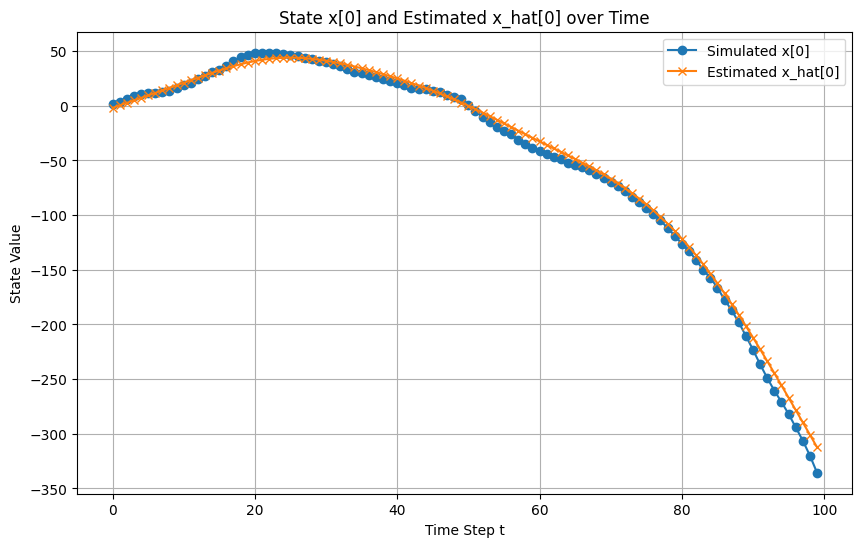

<Figure size 1000x600 with 0 Axes>

Text(0.5, 1.0, 'State x[1] and Estimated x_hat[1] over Time')

Text(0.5, 0, 'Time Step t')

Text(0, 0.5, 'State Value')

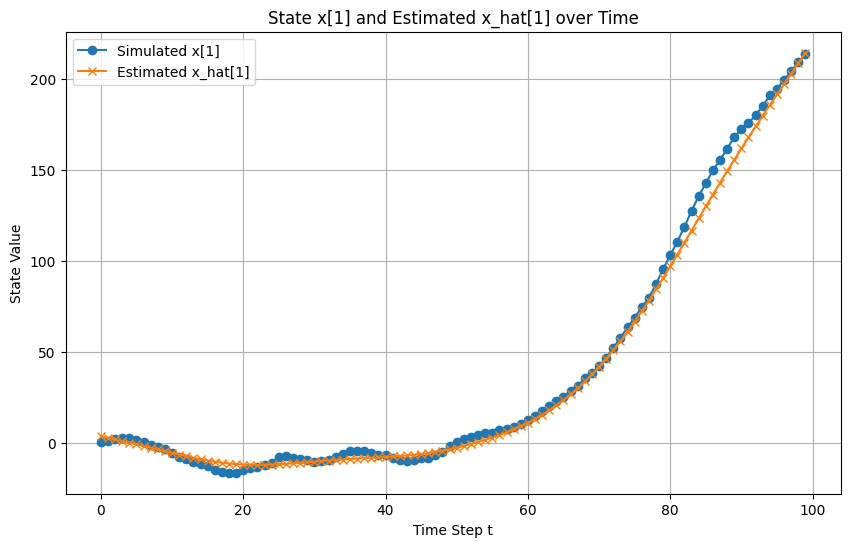

<Figure size 1000x600 with 0 Axes>

Text(0.5, 1.0, 'State x[2] and Estimated x_hat[2] over Time')

Text(0.5, 0, 'Time Step t')

Text(0, 0.5, 'State Value')

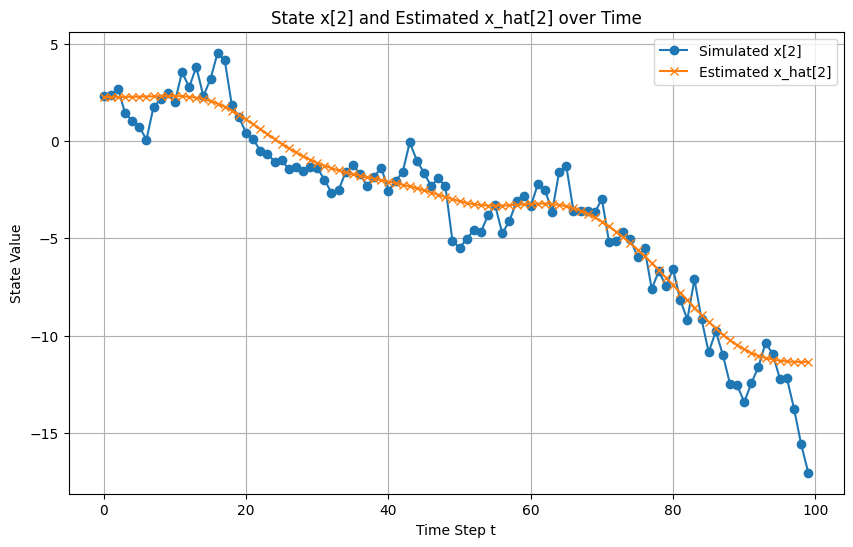

<Figure size 1000x600 with 0 Axes>

Text(0.5, 1.0, 'State x[3] and Estimated x_hat[3] over Time')

Text(0.5, 0, 'Time Step t')

Text(0, 0.5, 'State Value')

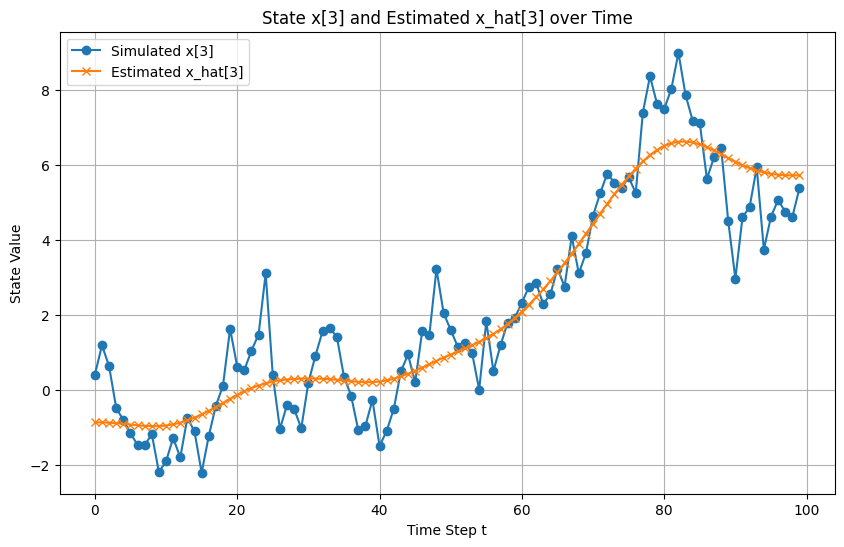

In [ ]:
T = len(x_hat)  # Use the length of x_hat to define the time vector

# Adjust the time vector to match the length of x_hat
t = np.arange(T)

# Assuming x_hat_m is a modified version of x_hat to match naming in your code,
# Ensure it's reshaped or sliced to match dimensions if necessary
x_hat_m = np.squeeze(np.array(x_hat))  # This helps if x_hat is an array of arrays
x=np.array(x)

# Loop through each state component for plotting
for i in range(x.shape[1]):  # Assuming x is 2D and we're iterating over the second dimension
    plt.figure(figsize=(10, 6))

    # Plot simulated state, excluding the initial state from x for plotting
    plt.plot(t, x[1:, i], label=f'Simulated x[{i}]', marker='o')  # Adjust x to exclude its first entry

    # Plot estimated state
    plt.plot(t, x_hat_m[:, i], label=f'Estimated x_hat[{i}]', marker='x')

    plt.title(f'State x[{i}] and Estimated x_hat[{i}] over Time')
    plt.xlabel('Time Step t')
    plt.ylabel('State Value')
    plt.legend()
    plt.grid(True)
    plt.show()

In [ ]:
import numpy as np

# System matrices
A = np.block([[np.eye(2), np.eye(2)], [np.zeros((2, 2)), np.eye(2)]])
B = np.block([[np.zeros((2, 2))], [np.eye(2)]])
C = np.block([[np.eye(2), np.zeros((2, 2))]])

#  dimensions for noise generation
n, m, K = A.shape[0], B.shape[1], C.shape[0]

# covariance matrices
P = np.eye(m)
R = np.eye(K)
Q = np.eye(n)


T = 100  # Number of time steps

# Generate process and measurement noise
w = [np.random.multivariate_normal(mean=np.zeros(m), cov=P) for _ in range(T)]
v = [np.random.multivariate_normal(mean=np.zeros(K), cov=R) for _ in range(T)]

# Initialize the state vector list with the initial state
x = [np.random.multivariate_normal(mean=np.zeros(n), cov=Q)]

# Simulate the system dynamics
for t in range(T):
    x_next = A @ x[t] + B @ w[t]
    x.append(x_next)
#print(x)

y = [C @ x[t] + v[t] for t in range(T)]


# first 5 measurements
print(y)
y1 = np.concatenate(y)
#print(y1.shape)

T = 100
lam = 1e+3 # lamda value is assigned as 10^3
rcond=-1
z,x_hat, y_hat,Atil,btil,zeros_part,y_flat,Ctil,dtil = lqe(A, B, C, y, T, lam,rcond)


[array([0.64010861, 0.62184143]), array([-0.91845178,  2.73553439]), array([ 1.13369877, -0.89789785]), array([ 1.94343785, -0.45044072]), array([ 4.82623302, -5.63064   ]), array([ 1.19931402, -8.8060654 ]), array([  3.51989003, -15.68615672]), array([ -2.06191636, -23.11709526]), array([ -1.13802992, -26.65489284]), array([ -5.97581905, -34.56263517]), array([ -8.89396617, -39.89889618]), array([-11.39114013, -45.93156361]), array([-14.09596988, -51.11596388]), array([-16.81985035, -57.10208176]), array([-20.29786513, -65.54068832]), array([-23.97046021, -70.47103368]), array([-24.5482798, -77.4087524]), array([-25.07918037, -88.72991691]), array([-26.43360001, -96.19452156]), array([ -28.65937297, -106.05132164]), array([ -27.01108163, -115.2766541 ]), array([ -26.10449115, -124.83897469]), array([ -31.79250373, -132.14111661]), array([ -35.17531095, -139.84490731]), array([ -37.96139942, -151.69197153]), array([ -38.60399524, -160.87447483]), array([ -40.64565604, -170.54146839]), 

(398, 1)
(396, 598)
(398, 1)
(396, 598)
(398, 1)
(396, 598)
(398, 1)
(396, 598)


Text(0.5, 0, 'Lambda')

Text(0, 0.5, 'Error')

Text(0.5, 1.0, 'Error vs. Lambda')

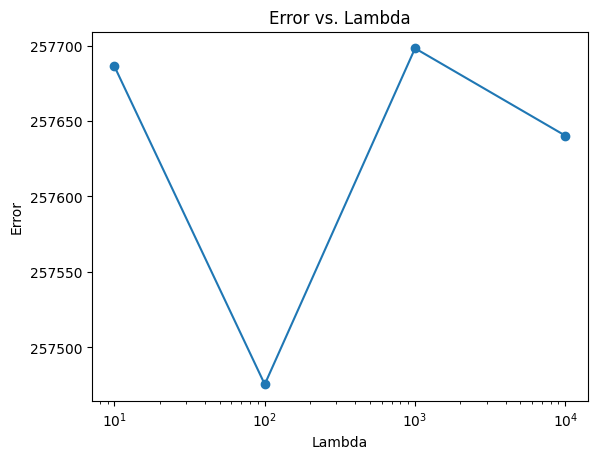

In [ ]:
def grid_search_lqe(A, B, C, y, T, lambda_values, rcond=None):
    errors = []

    for lam in lambda_values:
        z,x_hat, y_hat,Atil,btil,zeros_part,y_flat,Ctil,dtil = lqe(A, B, C, y, T, lam, rcond)

        # Calculate the error for the current lambda
        error = sum(np.linalg.norm(y[t] - y_hat[t]) ** 2 for t in range(T)) / T
        errors.append(error)

    return errors

# Define the lambda values for the grid search
lambda_values = [10 ** i for i in range(1, 5)]

# Perform the grid search
errors = grid_search_lqe(A, B, C, y, T, lambda_values)

# Plot the errors against lambda values
plt.semilogx(lambda_values, errors, marker='o')
plt.xlabel('Lambda')
plt.ylabel('Error')
plt.title('Error vs. Lambda')
plt.show()
